# Example ABRACADABRA Analysis

Here we show an example of the ABRACADABRA analysis pipeline.

## Import Code and Setup Plotting Defaults

In [1]:
# Import basics
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Import MC generation and data analysis code The necessary modules
sys.path.append('./Generate-MC/')
import PSD_MC_Gen # MC Generation
sys.path.append('./Analyze-Data/')
import ABRA_Limit # Data analysis

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])

# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0

# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 14,10

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

# Step 1: Generate Monte Carlo

Firstly we will generate some simple Monte Carlo to analyze. The parameters we use are outlined below. Note that we use larger halo velocity parameters than are physical to make life easier (we don't need to bin as finely in frequency). We have also set a large signal strength, this can easily be adjusted.

This is done using the `PSD_MC_Gen.PSD_Gen`, and has the following arguments:

| Argument | Purpose |
| ------------- | ------------- |
| freqs | array of frequencies to calculate the PSD at [Hz] |
| ma | ma/2pi is the axion mass [Hz] |
| A | proxy for axion coupling, $A = (g_{a\gamma\gamma} B_{\rm max} V_B \alpha)^2 \rho_{\rm DM} (L/L_p) / 4$ |
| PSDback | mean expected background Power Spectral Density |
| v0 | halo velocity dispersion ($=\sqrt{2} \sigma_v$), nominally 220 km/s |
| vObs | velocity of the Sun in the Milky Way frame, nominally 232 km/s |
| num_stacked | the number of subintervals over which the data is stacked |
| seed | an integer to seed the random number generator |

The code generates data in the form of Power Spectral Densities (PSD).

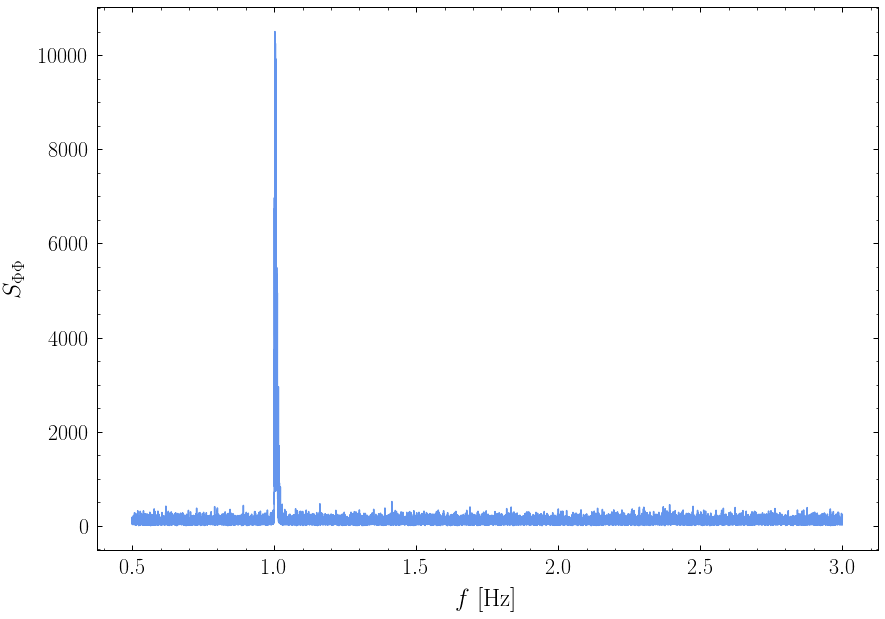

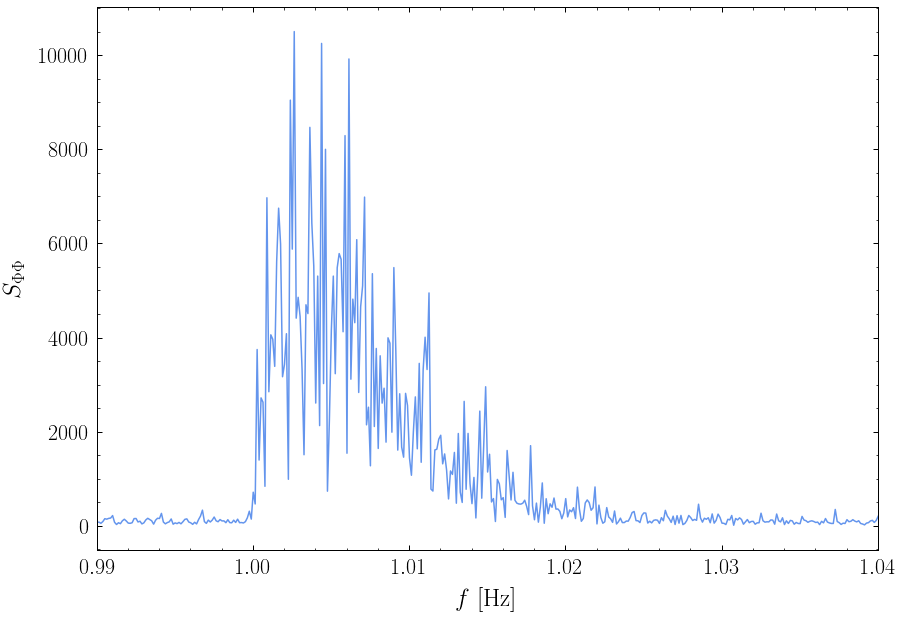

In [3]:
# Velocities
v0_Halo = 22000.0 # [km/s]
vObs_Halo = 23200.0 # [km/s]
c = 299792.458 # [km/s]

# Signal parameters
mass = 2*np.pi
A = 100.

# Background parameter
PSDback = 100.0

# Frequencies to scan over - check we have enough to resolve the masses
freqMin = .5
freqMax = 3
N_freqs = 20000

freqs = np.linspace(freqMin, freqMax, N_freqs)
if (3.*(v0_Halo + vObs_Halo)**2. / c**2.) / (freqs[1] - freqs[0]) * freqMin < 150:
    print('Do not continue! Masses will not be sufficiently resolved!')
    
# Number of times we will be stacking the data
N_stacked = 3

# Setup random number  generator seed
seed = 0

# Now generate the PSD
PSD = PSD_MC_Gen.PSD_gen(freqs, mass, A, PSDback, v0_Halo, vObs_Halo, N_stacked, seed)

# Plot the data in full, and zoom in around the signal
plt.plot(freqs, PSD)
plt.ylabel(r'$S_{\Phi\Phi}$')
plt.xlabel(r'$f$  [Hz]')
plt.show()

plt.plot(freqs, PSD)
plt.ylabel(r'$S_{\Phi\Phi}$')
plt.xlabel(r'$f$  [Hz]')
plt.xlim(.99, 1.04)
plt.show()

# Step 2: Analyze the Data

Next we analyze the simple MC generated above. The steps below can also be repeated on real data.

The analysis is performed using `ABRA_Limit.axion_limit_params`, which has the following arguments:

This is done using the `PSD_MC_Gen`, and has the following arguments:

| Argument | Purpose |
| ------------- | ------------- |
| data | The PSD associated with the measurements |
| freqs | array of frequencies associated with the data points [Hz] |
| PSDback_min | minimum PSD background to sample over |
| PSDback_max | maximum PSD background to sample over |
| PSDback_bins | number of bins to scan PSD background over |
| num_stacked | the number of subintervals over which the data is stacked |
| min_Resolve | the minimum relative frequency to resolve, should be left at default 150 |
| v0 | halo velocity dispersion ($=\sqrt{2} \sigma_v$), nominally 220 km/s |
| vObs | velocity of the Sun in the Milky Way frame, nominally 232 km/s |

The code then outputs a series of arrays, specifically:

    - mass_TestSet: an array of axion masses tested
    - A_limits: an array of limits on A at those masses
    - median: the median expected limit (on A)
    - Sig1Lo: 1 sigma lower limit (on A)
    - Sig1Up: 1 sigma upper limit (on A)
    - Sig2Up: 2 sigma upper limit (on A)
    - Sig2Lo: 2 sigma lower limit (on A)
    - detection: 5 sigma detection threshold including look elsewhere (on A)
   
This information is then enough to create a limit plot as we show below. Note everything is in terms of $G = \sqrt{A}$, where:

$$A = (g_{a\gamma\gamma} B_{\rm max} V_B \alpha)^2 \rho_{\rm DM} (L/L_p) / 4$$

and axion masses in Hz. Below we will show how to move back to physical units.

Let's start with an example where we don't scan over the background.

Best fit PSDback: 100.0


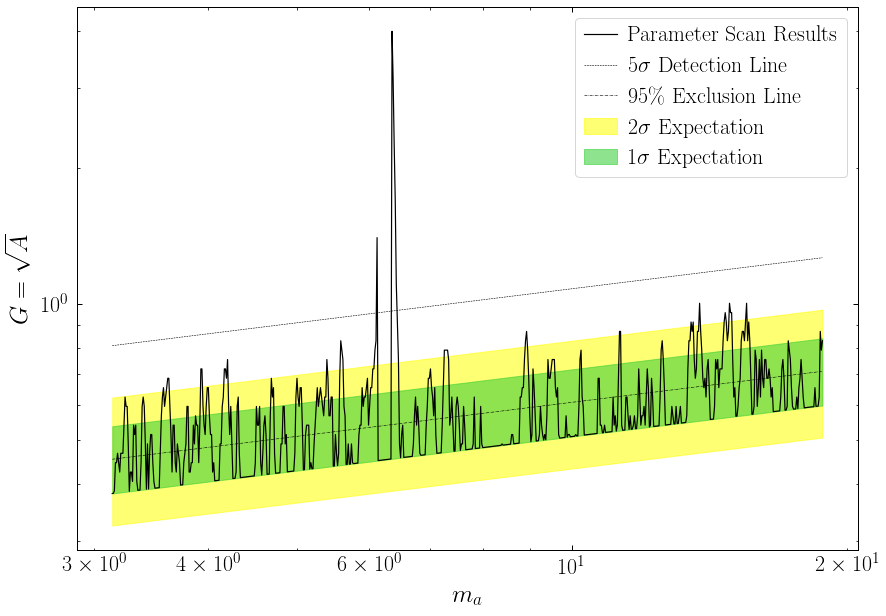

In [4]:
# Setup background PSD scan parameters - here just look at the true value
PSD_testMin = 100.0
PSD_testMax = 100.0
PSDback_bins = 1

# Analyze data
mass_TestSet, G_limits, median, Sig1Lo, Sig1Up, Sig2Up, Sig2Lo, detection \
    = ABRA_Limit.axion_limit_params(PSD, freqs, PSD_testMin, PSD_testMax, PSDback_bins,
                                    num_stacked = N_stacked, v0 = v0_Halo, vObs = vObs_Halo)

# Create Limit Plot
plt.plot(mass_TestSet[:], G_limits[:], c = 'black', label = r'Parameter Scan Results', lw=1.2)
plt.plot(mass_TestSet, detection, c= 'black', ls = 'dashed', label = r'5$\sigma$ Detection Line', lw=0.6)
plt.plot(mass_TestSet, median, c= 'black', ls = 'dashdot', label = r'95\% Exclusion Line', lw=0.6)

plt.fill_between(mass_TestSet, Sig2Up, Sig2Lo, color = 'yellow', alpha = .55, 
                 label = r'2$\sigma$ Expectation')
plt.fill_between(mass_TestSet, Sig1Up, Sig1Lo, color = 'limegreen', alpha = .55, 
                 label = r'1$\sigma$ Expectation')

plt.ylabel(r'$G=\sqrt{A}$')
plt.xlabel(r'$m_a$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Note we see a spike exactly where we injected a signal, ma=$2 \pi$! Next lets scan over the background, as can be seen this slows the limit evaluation down.

Best fit PSDback: 99.0


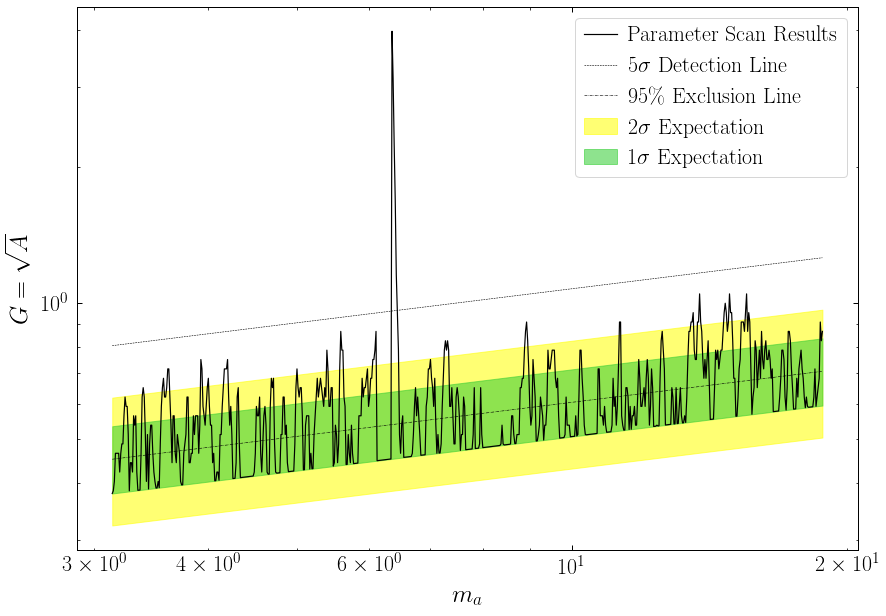

In [5]:
# Setup background PSD scan parameters - do a very simple scan
PSD_testMin = 99.0
PSD_testMax = 101.0
PSDback_bins = 3

# Analyze data
mass_TestSet, G_limits, median, Sig1Lo, Sig1Up, Sig2Up, Sig2Lo, detection \
    = ABRA_Limit.axion_limit_params(PSD, freqs, PSD_testMin, PSD_testMax, PSDback_bins,
                                    num_stacked = N_stacked, v0 = v0_Halo, vObs = vObs_Halo)

# Create Limit Plot
plt.plot(mass_TestSet[:], G_limits[:], c = 'black', label = r'Parameter Scan Results', lw=1.2)
plt.plot(mass_TestSet, detection, c= 'black', ls = 'dashed', label = r'5$\sigma$ Detection Line', lw=0.6)
plt.plot(mass_TestSet, median, c= 'black', ls = 'dashdot', label = r'95\% Exclusion Line', lw=0.6)

plt.fill_between(mass_TestSet, Sig2Up, Sig2Lo, color = 'yellow', alpha = .55, 
                 label = r'2$\sigma$ Expectation')
plt.fill_between(mass_TestSet, Sig1Up, Sig1Lo, color = 'limegreen', alpha = .55, 
                 label = r'1$\sigma$ Expectation')

plt.ylabel(r'$G=\sqrt{A}$')
plt.xlabel(r'$m_a$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Finally lets convert back to physical quantities using the nominal parameters below.

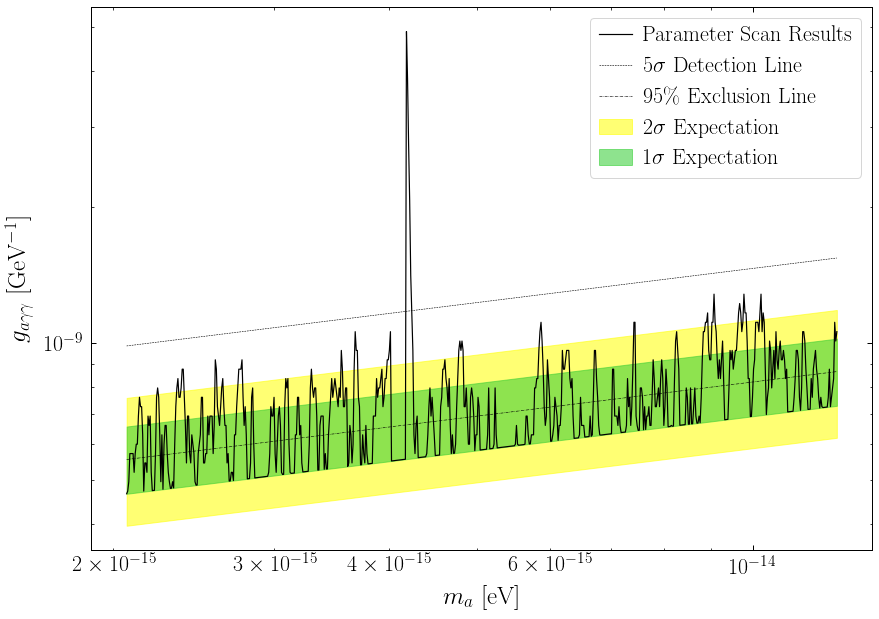

In [6]:
# Convert mass from frequency (1/T) to Energy [eV], i.e. multiply by hbar
mass_TestSet = mass_TestSet*(6.581220e-16)

# Setup basic quantities
V_B = 1.0 # [m^3]
B_max = 5.0 # [Wb/m^2]
Rho_dm = .3 # [GeV/cm^3]
alphaSq = 0.5
Lind = 1 # [nH]
Lpind = 7e3 # [nH]

# Convert everything to eV where possible
metersToInvEv = 1.0 / (1.9732705e-7)
cmToInvEv = metersToInvEv / 100
webersToUnitless = 5.01703e15

V_B_Ev = V_B * metersToInvEv**3
B_max_Ev = B_max * webersToUnitless / metersToInvEv**2
Rho_dm_Ev = Rho_dm * 10**9 / cmToInvEv**3

# Now convert quantities to gagammagamma, and then to per GeV
G_limits = 10**9 * G_limits / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
detection = 10**9 * detection / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
median = 10**9 * median / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
Sig1Up = 10**9 * Sig1Up / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
Sig1Lo = 10**9 * Sig1Lo / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
Sig2Up = 10**9 * Sig2Up / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5
Sig2Lo = 10**9 * Sig2Lo / (alphaSq * (Lind/Lpind) * B_max_Ev**2 * V_B_Ev**2 * Rho_dm_Ev / 4)**.5

# Now plot again
plt.plot(mass_TestSet[:], G_limits[:], c = 'black', label = r'Parameter Scan Results', lw=1.2)
plt.plot(mass_TestSet, detection, c= 'black', ls = 'dashed', label = r'5$\sigma$ Detection Line', lw=0.6)
plt.plot(mass_TestSet, median, c= 'black', ls = 'dashdot', label = r'95\% Exclusion Line', lw=0.6)

plt.fill_between(mass_TestSet, Sig2Up, Sig2Lo, color = 'yellow', alpha = .55, 
                 label = r'2$\sigma$ Expectation')
plt.fill_between(mass_TestSet, Sig1Up, Sig1Lo, color = 'limegreen', alpha = .55, 
                 label = r'1$\sigma$ Expectation')

plt.ylabel(r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')
plt.xlabel(r'$m_a$ [eV]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()